## Data and Libraries Setup:

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.inspection import permutation_importance

In [2]:
#import the financial distress CSV as a dataframe

df = pd.read_csv('C:/Users/Osama/Desktop/Dissertation/Data/Financial_Distress_Prediction_Dataset.csv')

## Dataframe Exploration:

In [3]:
#display the dataframe

display(df.sample(n=10)) 

,ID,Company Name,Year,Sector,Financial Distress,Shareholder Concentration (%),Independence Indicator,CEO Duality,Board of Directors Size,Director Remuneration (£million),Corporate Borrowing,Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
368,369,CAMELLIA PUBLIC LIMITED COMPANY,2022,"Agriculture, Horticulture & Livestock",1,70.19,1,1,32,2.596,0,134,-0.029731,0.004547
1059,1060,HAMMERSON PLC,2019,Construction,1,93.73,6,1,56,2.967,0,83,-0.133909,0.013984
2498,2499,THE ALUMASC GROUP PLC,2020,Metals & Metal Products,1,45.66,8,1,27,1.098,0,39,0.008099,0.008990
1398,1399,JOHNSON SERVICE GROUP PLC,2016,"Travel, Personal & Leisure",0,33.82,8,1,41,1.451,0,69,0.035893,0.010851
2569,2570,TOWN CENTRE SECURITIES PLC,2021,Property Services,0,24.11,6,0,32,1.443,0,64,-0.006691,0.022370
1034,1035,GREAT PORTLAND ESTATES P L C,2020,Construction,1,39.53,8,1,41,3.787,0,65,0.006756,0.002361
1452,1453,KIN AND CARTA PLC,2018,Printing & Publishing,0,49.30,8,0,37,1.658,0,42,-0.166897,0.014054
2348,2349,SPECTRIS PLC,2018,"Industrial, Electric & Electronic Machinery",0,0.00,8,0,45,4.458,0,37,0.055895,0.007644
334,335,BT GROUP PLC,2016,Communications,0,60.39,6,1,60,9.864,1,22,0.035453,0.017585
461,462,CHURCHILL CHINA PLC,2017,Miscellaneous Manufacturing,0,57.69,8,0,30,1.795,0,31,0.077406,0.004375


In [4]:
#check for missing vallues

df.isnull().sum().sum() 

0

In [5]:
#view the datatypes

print(df.dtypes)

ID                                        int64
Company Name                             object
Year                                      int64
Sector                                   object
Financial Distress                        int64
Shareholder Concentration (%)           float64
Independence Indicator                    int64
CEO Duality                               int64
Board of Directors Size                   int64
Director Remuneration (£million)        float64
Corporate Borrowing                       int64
Company Age                               int64
Retained Earnings / Total Assets (£)    float64
Interest Paid / Total Assets (£)        float64
dtype: object


In [6]:
#change 'ID' to a string

df['ID'] = df['ID'].astype(str)

print(df.dtypes)

ID                                       object
Company Name                             object
Year                                      int64
Sector                                   object
Financial Distress                        int64
Shareholder Concentration (%)           float64
Independence Indicator                    int64
CEO Duality                               int64
Board of Directors Size                   int64
Director Remuneration (£million)        float64
Corporate Borrowing                       int64
Company Age                               int64
Retained Earnings / Total Assets (£)    float64
Interest Paid / Total Assets (£)        float64
dtype: object


## Undersampling:

In [7]:
#set a seed for reproduction
np.random.seed(66344671)

#find the count in each class in Financial Distress
class_counts = df['Financial Distress'].value_counts()
print(class_counts)

#find the class with the lesser count
min_count = class_counts.min()

#create an empty dataframe
balanced_df = pd.DataFrame()

#resample the dataset to balance classes based on Financial Distress
for value in df['Financial Distress'].unique():
    subset = df[df['Financial Distress'] == value]
    resampled_subset = subset.sample(min_count, replace=False, random_state=66344671)
    balanced_df = pd.concat([balanced_df, resampled_subset.reset_index(drop=True)])

#reset the index of the dataframe and update it in place
balanced_df.reset_index(drop=True, inplace=True)

#display the dataframe
display(balanced_df.sample(10).round(4))

0    2141
1     651
Name: Financial Distress, dtype: int64


,ID,Company Name,Year,Sector,Financial Distress,Shareholder Concentration (%),Independence Indicator,CEO Duality,Board of Directors Size,Director Remuneration (£million),Corporate Borrowing,Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
907,2055,RENOLD PUBLIC LIMITED COMPANY,2016,Metals & Metal Products,1,63.20,8,1,44,1.577,0,92,0.0598,0.0085
1051,1011,GRAFENIA PLC,2020,Business Services,1,65.44,6,0,19,0.478,1,23,-0.2519,0.0255
571,1105,HELICAL PLC,2022,Construction,0,33.08,8,1,26,6.536,0,103,0.0672,0.0169
1157,1284,IQE PLC,2019,"Industrial, Electric & Electronic Machinery",1,41.84,8,1,27,1.887,0,24,-0.0952,0.0039
877,477,CLOUDCOCO GROUP PLC,2018,Communications,1,62.93,8,1,23,0.215,1,18,-0.2979,0.0476
423,1577,MCBRIDE PLC,2022,"Chemicals, Petroleum, Rubber & Plastic",0,54.17,8,1,40,1.392,0,30,-0.0521,0.0185
40,287,BP P.L.C.,2016,Mining & Extraction,0,25.56,8,0,91,14.231,1,114,-0.0171,0.0064
152,2013,REDDE NORTHGATE PLC,2018,"Travel, Personal & Leisure",0,72.02,8,0,42,1.057,0,126,0.0178,0.0101
1258,1009,GRAFENIA PLC,2022,Business Services,1,65.44,6,0,19,0.548,1,23,-0.0475,0.0294
1095,198,BABCOCK INTERNATIONAL GROUP PLC,2017,"Public Administration, Education, Health Socia...",1,9.04,8,1,49,6.777,1,34,0.0292,0.0109


## Descriptive Statistics:

In [8]:
#display the dataframe descriptive statistics

display(balanced_df.describe().round(3))

,Year,Financial Distress,Shareholder Concentration (%),Independence Indicator,CEO Duality,Board of Directors Size,Director Remuneration (£million),Corporate Borrowing,Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
count,1302.000,1302.0,1302.000,1302.000,1302.000,1302.000,1302.000,1302.000,1302.000,1302.000,1302.000
mean,2018.475,0.5,47.527,7.270,0.538,33.588,2.856,0.396,42.142,-0.058,0.016
std,2.234,0.5,24.327,1.588,0.499,15.172,4.156,0.489,32.989,0.268,0.034
min,2015.000,0.0,0.000,1.000,0.000,6.000,0.053,0.000,9.000,-3.869,0.000
25%,2017.000,0.0,27.060,8.000,0.000,23.000,0.694,0.000,19.000,-0.065,0.004
50%,2019.000,0.5,50.360,8.000,1.000,30.000,1.510,0.000,27.000,0.009,0.009
75%,2020.000,1.0,65.320,8.000,1.000,42.000,3.316,1.000,50.000,0.039,0.016
max,2022.000,1.0,97.890,8.000,1.000,91.000,53.358,1.000,139.000,1.258,0.539


In [9]:
#group the df by Financial Distress and Year and find the count
grouped_counts_df = balanced_df.groupby(['Financial Distress'])['Year'].value_counts().unstack()

#add a column for row totals
grouped_counts_df['Total'] = grouped_counts_df.sum(axis=1)

#add a row for year totals
grouped_counts_df.loc['Total'] = grouped_counts_df.sum(axis=0)

#display the count of financial distress by year
display(grouped_counts_df)

Year,2015,2016,2017,2018,2019,2020,2021,2022,Total
Financial Distress,,,,,,,,,
0,76,92,73,81,83,69,93,84,651
1,89,68,70,84,101,132,52,55,651
Total,165,160,143,165,184,201,145,139,1302


In [10]:
#group the df by Sector and Year and find the count while filling missing values with 0
grouped_counts_df = balanced_df.groupby(['Sector'])['Year'].value_counts().unstack().fillna(0)

#add a column for sector totals
grouped_counts_df['Total'] = grouped_counts_df.sum(axis=1)

#create and display a dataframe showing company count in each year and in total, sorted by the total
grouped_counts_df = pd.DataFrame(grouped_counts_df).sort_values(by='Total', ascending=False).style.format('{:.0f}')
display(grouped_counts_df)

Year,2015,2016,2017,2018,2019,2020,2021,2022,Total
Sector,,,,,,,,,
Business Services,32,35,29,31,36,45,33,25,266
Mining & Extraction,23,17,15,18,21,21,13,12,140
Construction,10,13,12,15,13,16,14,14,107
"Chemicals, Petroleum, Rubber & Plastic",11,9,11,9,13,14,12,14,93
Wholesale,8,11,8,11,8,13,9,7,75
"Industrial, Electric & Electronic Machinery",12,12,5,6,11,10,8,10,74
"Travel, Personal & Leisure",6,7,6,9,12,11,8,5,64
Computer Software,9,6,5,11,10,9,8,6,64
Biotechnology and Life Sciences,6,6,8,7,6,5,4,6,48


## Normality Test (Kolmogorov-Smirnov):

In [11]:
#create an empty dataframe to store the results
results = []

#iterate over each column in the dataframe
for column_name in balanced_df.columns:
    #check if the column is numeric
    if balanced_df[column_name].dtype == 'int64' or balanced_df[column_name].dtype == 'float64':
        #extract the values from the column
        column_values = balanced_df[column_name].values
        
        #conduct the Kolmogorov-Smirnov test
        ks_test = stats.kstest(column_values, 'norm')
        ks_statistic, ks_p_value = ks_test
        
        #store the results in a list
        results.append({'Column': column_name,
                        'Statistic': ks_statistic,
                        'P-value': ks_p_value})
        
#create a dataframe from the results list and display it
results_df = pd.DataFrame(results)
display(results_df.round(4))

print("\n- None of the variables are normally distributed")

,Column,Statistic,P-value
0,Year,1.0000,0.0
1,Financial Distress,0.5000,0.0
2,Shareholder Concentration (%),0.9798,0.0
3,Independence Indicator,0.9570,0.0
4,CEO Duality,0.5000,0.0
5,Board of Directors Size,1.0000,0.0
6,Director Remuneration (£million),0.5761,0.0
7,Corporate Borrowing,0.5000,0.0
8,Company Age,1.0000,0.0
9,Retained Earnings / Total Assets (£),0.4221,0.0



- None of the variables are normally distributed


## Correlation Analysis (Spearman):

In [12]:
#keep ordinal, continuous, and dependent variables only
cor_df = balanced_df.drop(['ID','Company Name','Sector','Year','CEO Duality', 'Corporate Borrowing'], axis=1)

#calculate correlation matrix (Spearman)
correlation_matrix, p_values = spearmanr(cor_df)

#convert correlation matrix to dataframe
correlation_df = pd.DataFrame(correlation_matrix, index=cor_df.columns, columns=cor_df.columns)

#convert p-values array to dataframe
p_values_df = pd.DataFrame(p_values, index=cor_df.columns, columns=cor_df.columns)

#display correlation matrix and p-values
print("Correlation Matrix:")
display(correlation_df.round(4))
print("Correlation Matrix P-Values:")
display(p_values_df.round(4))

Correlation Matrix:


,Financial Distress,Shareholder Concentration (%),Independence Indicator,Board of Directors Size,Director Remuneration (£million),Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
Financial Distress,1.0000,0.1334,-0.0470,-0.0536,-0.2645,-0.0779,-0.5306,0.1002
Shareholder Concentration (%),0.1334,1.0000,-0.3279,-0.3321,-0.5367,-0.0985,-0.1612,-0.0078
Independence Indicator,-0.0470,-0.3279,1.0000,0.1047,0.2201,0.0448,0.0570,-0.0172
Board of Directors Size,-0.0536,-0.3321,0.1047,1.0000,0.6257,0.4520,0.1019,0.1527
Director Remuneration (£million),-0.2645,-0.5367,0.2201,0.6257,1.0000,0.2572,0.3345,0.0510
Company Age,-0.0779,-0.0985,0.0448,0.4520,0.2572,1.0000,0.1881,-0.1038
Retained Earnings / Total Assets (£),-0.5306,-0.1612,0.0570,0.1019,0.3345,0.1881,1.0000,-0.2153
Interest Paid / Total Assets (£),0.1002,-0.0078,-0.0172,0.1527,0.0510,-0.1038,-0.2153,1.0000


Correlation Matrix P-Values:


,Financial Distress,Shareholder Concentration (%),Independence Indicator,Board of Directors Size,Director Remuneration (£million),Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
Financial Distress,0.0000,0.0000,0.0900,0.0533,0.000,0.0049,0.0000,0.0003
Shareholder Concentration (%),0.0000,0.0000,0.0000,0.0000,0.000,0.0004,0.0000,0.7783
Independence Indicator,0.0900,0.0000,0.0000,0.0002,0.000,0.1063,0.0397,0.5362
Board of Directors Size,0.0533,0.0000,0.0002,0.0000,0.000,0.0000,0.0002,0.0000
Director Remuneration (£million),0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0660
Company Age,0.0049,0.0004,0.1063,0.0000,0.000,0.0000,0.0000,0.0002
Retained Earnings / Total Assets (£),0.0000,0.0000,0.0397,0.0002,0.000,0.0000,0.0000,0.0000
Interest Paid / Total Assets (£),0.0003,0.7783,0.5362,0.0000,0.066,0.0002,0.0000,0.0000


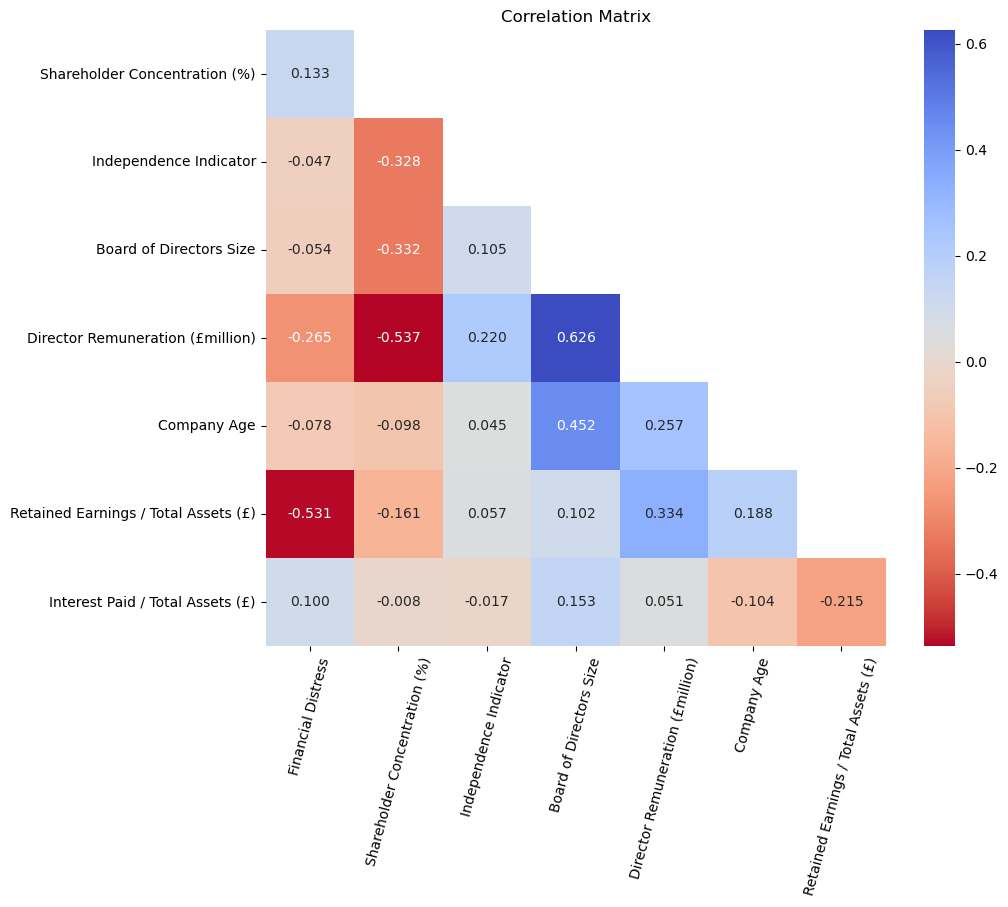

In [13]:
#calculate the correlation matrix (Spearman)
correlation_matrix = cor_df.corr(method='spearman')

#create a mask to hide the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#set the figure size
plt.figure(figsize=(10, 8))

#plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix.iloc[1:, :-1], annot=True, cmap='coolwarm_r', mask=mask[1:, :-1], fmt='.3f')
plt.xticks(rotation=75)
plt.title('Correlation Matrix')
plt.show()

## Chi-Square Tests (Pearson):

In [14]:
#create a contingency table for Financial Distress and CEO Duality
contingency_ceo = pd.crosstab(balanced_df['CEO Duality'], balanced_df['Financial Distress'])

#create a contingency table for Financial Distress and Corporate Borrowing
contingency_borrowing = pd.crosstab(balanced_df['Corporate Borrowing'], balanced_df['Financial Distress'])

#perform chi-square test for Financial Distress and CEO Duality
chi2_ceo, p_value_ceo, _, _ = chi2_contingency(contingency_ceo)

#perform chi-square test for Financial Distress and Corporate Borrowing
chi2_borrowing, p_value_borrowing, _, _ = chi2_contingency(contingency_borrowing)

#show the chi-square test and contingency table for Financial Distress and CEO Duality
p_value_ceo = round(p_value_ceo, 3)
display(contingency_ceo)
print("Chi-square value for 'Financial Distress' and 'CEO Duality':", chi2_ceo)
print("P-value for 'Financial Distress' and 'CEO Dality':", p_value_ceo)

#show the chi-square test and contingency table for Financial Distress and Corporate Borrowing
p_value_borrowing = round(p_value_borrowing, 3)
display(contingency_borrowing)
print("\nChi-square value for 'Financial Distress' and 'Corporate Borrowing':", chi2_borrowing)
print("P-value for 'Financial Distress' and 'Corporate Borrowing':", p_value_borrowing)

Financial Distress,0,1
CEO Duality,,
0,328,274
1,323,377


Chi-square value for 'Financial Distress' and 'CEO Duality': 8.678970099667774
P-value for 'Financial Distress' and 'CEO Dality': 0.003


Financial Distress,0,1
Corporate Borrowing,,
0,407,379
1,244,272



Chi-square value for 'Financial Distress' and 'Corporate Borrowing': 2.340271613704953
P-value for 'Financial Distress' and 'Corporate Borrowing': 0.126


## Pre-processing for Machine Learning:

In [15]:
#remove 'ID', 'Sector','Company Name', and 'year' columns
df_ml = balanced_df.drop(['ID', 'Sector', 'Company Name', 'Year'], axis=1)

#separate the features and target variable
X = df_ml.drop('Financial Distress', axis=1)
y = df_ml['Financial Distress']

#perform train-test split with stratified sampling and 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32663412, stratify=y)

#perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1- Logistic Regression:

Optimization terminated successfully.
         Current function value: 0.537793
         Iterations 8


,Variable,Coefficient,P-value
0,Constant,0.3921,0.000
1,Shareholder Concentration (%),0.0392,0.642
2,Independence Indicator,-0.0045,0.953
3,CEO Duality,0.2034,0.008
4,Board of Directors Size,0.2019,0.035
5,Director Remuneration (£million),-0.3960,0.001
6,Corporate Borrowing,0.1958,0.009
7,Company Age,-0.0545,0.465
8,Retained Earnings / Total Assets (£),-3.2900,0.000
9,Interest Paid / Total Assets (£),-0.7132,0.000


McFadden's R-squared: 0.22412811168834734

Odds Ratio:


,Variable,Odds Ratio,Odds Ratio P-value,95% CI Lower,95% CI Upper
1,Shareholder Concentration (%),1.0399,0.642,0.8819,1.2263
2,Independence Indicator,0.9955,0.953,0.8580,1.1551
3,CEO Duality,1.2256,0.008,1.0557,1.4229
4,Board of Directors Size,1.2237,0.035,1.0140,1.4767
5,Director Remuneration (£million),0.6730,0.001,0.5359,0.8451
6,Corporate Borrowing,1.2163,0.009,1.0492,1.4101
7,Company Age,0.9470,0.465,0.8184,1.0959
8,Retained Earnings / Total Assets (£),0.0373,0.000,0.0207,0.0671
9,Interest Paid / Total Assets (£),0.4901,0.000,0.3704,0.6484


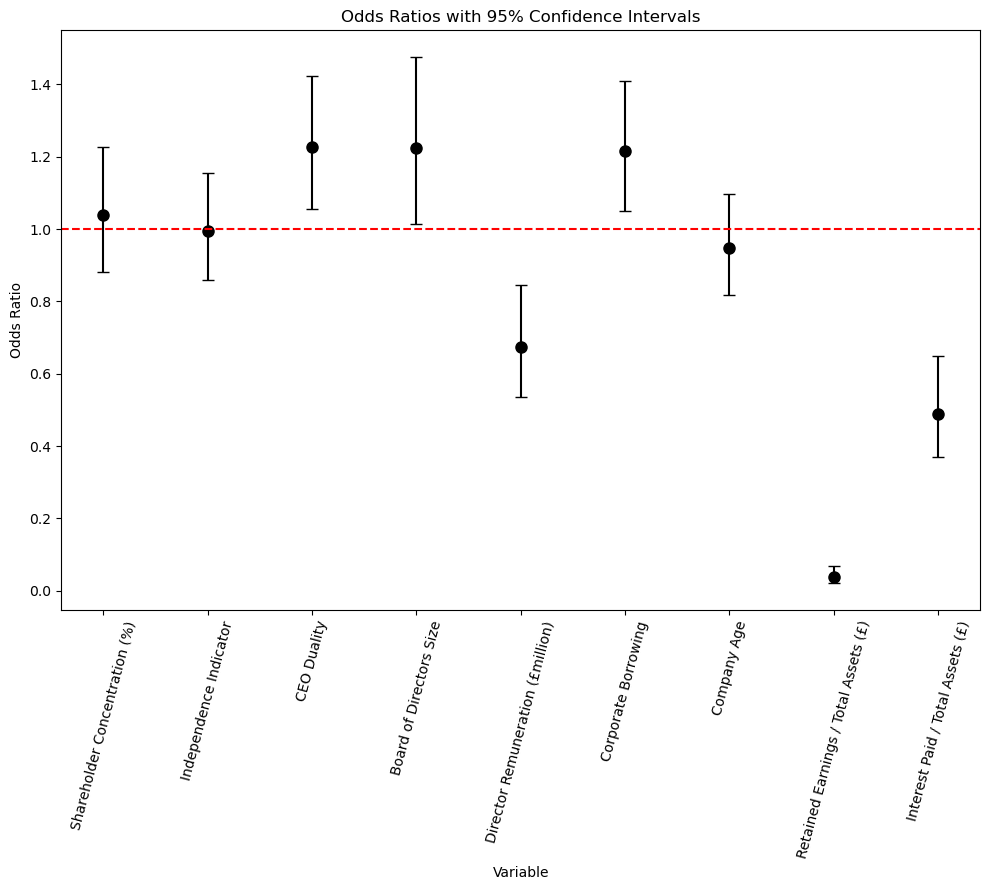

In [16]:
##Logistc Regression Association Test


#fit logistic regression with statsmodels to get p-values and coefficients
logreg_sm = sm.Logit(y_train, sm.add_constant(X_train_scaled)).fit()

#calculate odds ratios and confidence intervals
p_values = logreg_sm.pvalues
r_squared = logreg_sm.prsquared

#create a dataframe to store the results
results = pd.DataFrame({
    'Variable': ['Constant'] + X_train.columns.tolist(),
    'Coefficient': [logreg_sm.params[0]] + logreg_sm.params[1:].tolist(),
    'P-value': [p_values[0]] + p_values[1:].round(3).tolist()
})

#print the results table
display(results.round(4))
print("McFadden's R-squared:", r_squared)


##Odds Ratio


#calculate odds ratios and confidence intervals, and exclude the constant term p-value
odds_ratios = np.exp(logreg_sm.params)
odds_ratio_p_values = logreg_sm.pvalues.drop('const')
ci_lower = np.exp(logreg_sm.conf_int(0.05)[0])
ci_upper = np.exp(logreg_sm.conf_int(0.05)[1])

odds= pd.DataFrame({
    'Variable': ['Constant'] + X_train.columns.tolist(),
    'Odds Ratio': [odds_ratios[0]] + odds_ratios[1:].tolist(),
    'Odds Ratio P-value': [np.nan] + odds_ratio_p_values.round(3).tolist(),
    '95% CI Lower': [ci_lower[0]] + ci_lower[1:].tolist(),
    '95% CI Upper': [ci_upper[0]] + ci_upper[1:].tolist()
})

print("\nOdds Ratio:")
display(odds[1:].round(4))

#exclude the constant from visualization
odds_subset = odds[1:]

#set the variables for visualization
variables = odds_subset['Variable']
odds_ratio = odds_subset['Odds Ratio']
ci_lower = odds_subset['95% CI Lower']
ci_upper = odds_subset['95% CI Upper']

#set the figure size
plt.figure(figsize=(10, 9))

#set the positions of the variables on the x-axis
x_pos = np.arange(len(variables))

#plot the odds ratio with confidence intervals as box plots
plt.plot(x_pos, odds_ratio, 'ko', markersize=8)
plt.errorbar(x_pos, odds_ratio, yerr=[odds_ratio - ci_lower, ci_upper - odds_ratio],fmt='none', capsize=4, color='k')

#set the x-axis labels
plt.xticks(x_pos, variables, rotation=75)

#name the axes and title
plt.xlabel('Variable')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios with 95% Confidence Intervals')

#add a dashed line on the odd value (1) to detrmine insignificant varaibles
plt.axhline(y=1, color='r', linestyle='--')

#display the plot
plt.tight_layout()
plt.show()


In [17]:
##Logistic Regression Tuned Model for Prediction


#define the logistic regression model
logreg = LogisticRegression()

#define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10]}

#perform hyperparameter optimization using the parameter grid
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#find the best model
best_model_logreg = grid_search.best_estimator_

#perform cross-validation with the best model
cross_val_scores_logreg = cross_val_score(best_model_logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')

#predict the target variable for the test set
y_pred = best_model_logreg.predict(X_test_scaled)

#calculate evaluation metrics for the test set
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred)

#print the evaluation metrics
print("Logistic Regression:\n")
print("Cross-Validation Mean Accuracy:", cross_val_scores_logreg.mean().round(4))
print("Test Set Accuracy:", accuracy_logreg.round(4))
print("Precision:", precision_logreg.round(4))
print("Recall:", recall_logreg.round(4))
print("F1 Score:", f1_logreg.round(4))
print("ROC AUC Score:", roc_auc_logreg.round(4))

Logistic Regression:

Cross-Validation Mean Accuracy: 0.7368
Test Set Accuracy: 0.7318
Precision: 0.785
Recall: 0.6412
F1 Score: 0.7059
ROC AUC Score: 0.7321


## 2- Support Vector Machines:

In [18]:
##Support Vector Machines Tuned Model for Prediction


#define the SVM model
svm_model = SVC()

#define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1]
}

#perform hyperparameter optimization using the parameter grid
grid_search = GridSearchCV(svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#find the best model
best_model_svm = grid_search.best_estimator_

#perform cross-validation with the best model
cross_val_scores_svm = cross_val_score(best_model_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')

#predict the target variable for the test set
y_pred = best_model_svm.predict(X_test_scaled)

#calculate evaluation metrics for the test set
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_pred)

#print the evaluation metrics
print("Support Vector Machine (SVM):\n")
print("Cross-Validation Mean Accuracy:", cross_val_scores_svm.mean().round(4))
print("Test Set Accuracy:", accuracy_svm.round(4))
print("Precision:", precision_svm.round(4))
print("Recall:", recall_svm.round(4))
print("F1 Score:", f1_svm.round(4))
print("ROC AUC Score:", roc_auc_svm.round(4))


Support Vector Machine (SVM):

Cross-Validation Mean Accuracy: 0.7406
Test Set Accuracy: 0.7433
Precision: 0.8333
Recall: 0.6107
F1 Score: 0.7048
ROC AUC Score: 0.7438


## 3- Decision Trees:

In [19]:
##Decision Trees Tuned Model for Prediction


#define the Decision Trees model
dt_model = DecisionTreeClassifier()

#define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#perform hyperparameter optimization using the parameter grid
grid_search = GridSearchCV(dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#find the best model
best_model_dt = grid_search.best_estimator_

#perform cross-validation with the best model
cross_val_scores_dt = cross_val_score(best_model_dt, X_train_scaled, y_train, cv=5, scoring='accuracy')

#predict the target variable for the test set
y_pred = best_model_dt.predict(X_test_scaled)

#calculate evaluation metrics for the test set
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred)

#print the evaluation metrics
print("Decision Trees:\n")
print("Cross-Validation Mean Accuracy:", cross_val_scores_dt.mean().round(4))
print("Test Set Accuracy:", accuracy_dt.round(4))
print("Precision:", precision_dt.round(4))
print("Recall:", recall_dt.round(4))
print("F1 Score:", f1_dt.round(4))
print("ROC AUC Score:", roc_auc_dt.round(4))


Decision Trees:

Cross-Validation Mean Accuracy: 0.7387
Test Set Accuracy: 0.7471
Precision: 0.7826
Recall: 0.687
F1 Score: 0.7317
ROC AUC Score: 0.7474


## 4- Random Forests:

In [24]:
##Random Forests Tuned Model for Prediction


#define the Random Forest model
random_forest = RandomForestClassifier()

#define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

#perform hyperparameter optimization using the parameter grid
grid_search = GridSearchCV(random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#find the best model
best_model_rf = grid_search.best_estimator_

#perform cross-validation with the best model
cross_val_scores_rf = cross_val_score(best_model_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

#predict the target variable for the test set
y_pred = best_model_rf.predict(X_test_scaled)

#calculate evaluation metrics for the test set
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)

#print the evaluation metrics
print("Random Forests:\n")
print("Cross-Validation Mean Accuracy:", cross_val_scores_rf.mean().round(4))
print("Test Set Accuracy:", accuracy_rf.round(4))
print("Precision:", precision_rf.round(4))
print("Recall:", recall_rf.round(4))
print("F1 Score:", f1_rf.round(4))
print("ROC AUC Score:", roc_auc_rf.round(4))

Random Forests:

Cross-Validation Mean Accuracy: 0.7425
Test Set Accuracy: 0.751
Precision: 0.7705
Recall: 0.7176
F1 Score: 0.7431
ROC AUC Score: 0.7511


## 5- Artificial Neural Networks (Multi-Layer Perceptron):

In [21]:
##Artificial Neural Networks (Multi-Layer Perceptron) Tuned Model for Prediction


#define the Artificial Neural Networks (Multi-Layer Perceptron) model
ann_model = MLPClassifier(max_iter=500)

#define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant']
}

#perform hyperparameter optimization using the parameter grid
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid_search = GridSearchCV(ann_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) 
    grid_search.fit(X_train_scaled, y_train)

#find the best model
best_model_ann = grid_search.best_estimator_

#perform cross-validation with the best model
cross_val_scores_ann = cross_val_score(best_model_ann, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)

#predict the target variable for the test set
y_pred = best_model_ann.predict(X_test_scaled)

#calculate evaluation metrics for the test set
accuracy_ann = accuracy_score(y_test, y_pred)
precision_ann = precision_score(y_test, y_pred)
recall_ann = recall_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)
roc_auc_ann = roc_auc_score(y_test, y_pred)

#print the evaluation metrics
print("Artificial Neural Networks (Multi-Layer Perceptron):\n")
print("Cross-Validation Mean Accuracy:", cross_val_scores_ann.mean().round(4))
print("Test Set Accuracy:", accuracy_ann.round(4))
print("Precision:", precision_ann.round(4))
print("Recall:", recall_ann.round(4))
print("F1 Score:", f1_ann.round(4))
print("ROC AUC Score:", roc_auc_ann.round(4))

Artificial Neural Networks (Multi-Layer Perceptron):

Cross-Validation Mean Accuracy: 0.7137
Test Set Accuracy: 0.7701
Precision: 0.8142
Recall: 0.7023
F1 Score: 0.7541
ROC AUC Score: 0.7704


## Overall Models Evaluation Metrics:

In [25]:
#create a data dictionary
data = {
    'Model': [
    'Logistic Regression',
    'Support Vector Machines', 
    'Decision Trees', 
    'Random Forests', 
    'Artificial Neural Networks'
    ],
    'Accuracy': [
        f"{accuracy_logreg*100:.2f}%",
        f"{accuracy_svm*100:.2f}%",
        f"{accuracy_dt*100:.2f}%",
        f"{accuracy_rf*100:.2f}%",
        f"{accuracy_ann*100:.2f}%"
    ],
    'Precision': [
        f"{precision_logreg*100:.2f}%",
        f"{precision_svm*100:.2f}%",
        f"{precision_dt*100:.2f}%",
        f"{precision_rf*100:.2f}%",
        f"{precision_ann*100:.2f}%"
    ],
    'Recall': [
        f"{recall_logreg*100:.2f}%",
        f"{recall_svm*100:.2f}%",
        f"{recall_dt*100:.2f}%",
        f"{recall_rf*100:.2f}%",
        f"{recall_ann*100:.2f}%"
    ],
    'F1 Score': [
        f"{f1_logreg*100:.2f}%",
        f"{f1_svm*100:.2f}%",
        f"{f1_dt*100:.2f}%",
        f"{f1_rf*100:.2f}%",
        f"{f1_ann*100:.2f}%"
    ],
    'ROC AUC Score': [
        f"{roc_auc_logreg*100:.2f}%",
        f"{roc_auc_svm*100:.2f}%",
        f"{roc_auc_dt*100:.2f}%",
        f"{roc_auc_rf*100:.2f}%",
        f"{roc_auc_ann*100:.2f}%"
    ]
}


#create a dataframe from the dictionary
evaluation_metrics = pd.DataFrame(data)

#display the dataframe
display(evaluation_metrics)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,73.18%,78.50%,64.12%,70.59%,73.21%
1,Support Vector Machines,74.33%,83.33%,61.07%,70.48%,74.38%
2,Decision Trees,74.71%,78.26%,68.70%,73.17%,74.74%
3,Random Forests,75.10%,77.05%,71.76%,74.31%,75.11%
4,Artificial Neural Networks,77.01%,81.42%,70.23%,75.41%,77.04%


## Feature Importances (Permutation Importance):

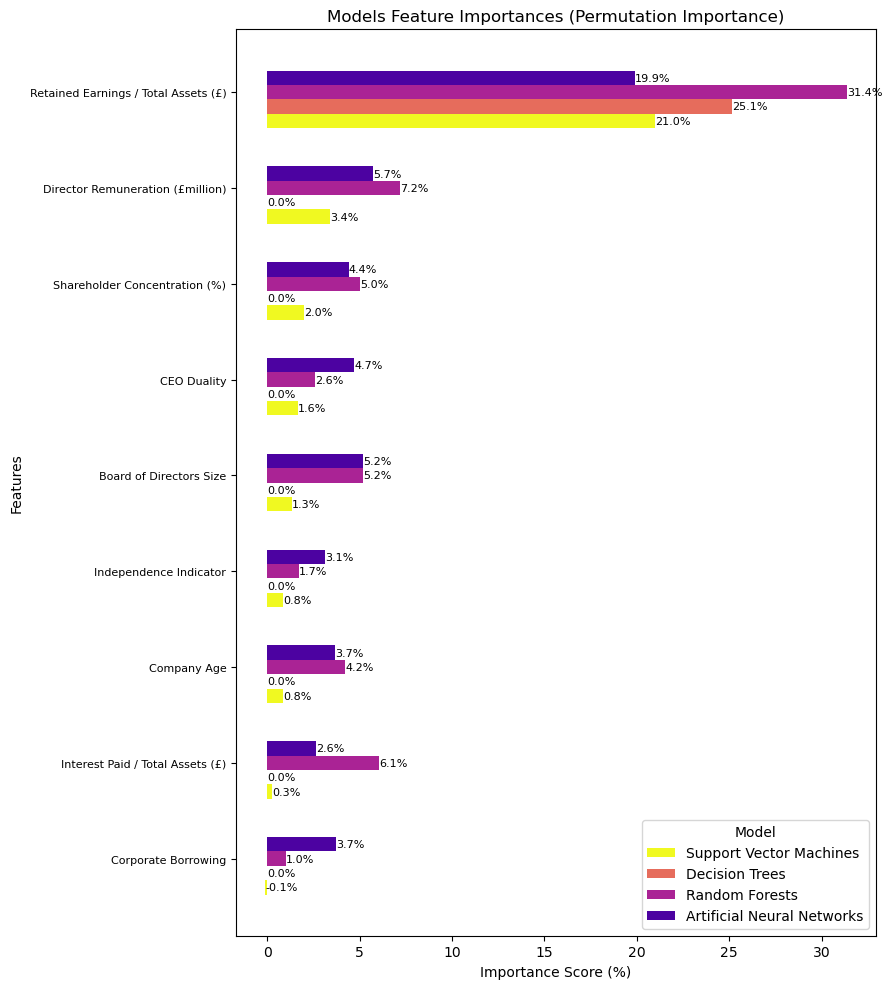

In [23]:
## Feature Importances (Permutation Importance) Setup


#get the feature importances (permutation importance) - Support Vector Machines
importance_scores_svm = permutation_importance(best_model_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_scores_svm_mean = importance_scores_svm.importances_mean*100

#get the feature importances (permutation importance) - Decision Trees
importance_scores_dt = permutation_importance(best_model_dt, X_train_scaled, y_train, n_repeats=10, random_state=42)
importance_scores_dt_mean = importance_scores_dt.importances_mean*100

#get the feature importances (permutation importance) - Random Forests
importance_scores_rf = permutation_importance(best_model_rf, X_train_scaled, y_train, n_repeats=10, random_state=42)
importance_scores_rf_mean = importance_scores_rf.importances_mean*100

#get the feature importances (permutation importance) - Artificial Neural Networks
importance_scores_ann = permutation_importance(best_model_ann, X_train_scaled, y_train, n_repeats=10, random_state=42)
importance_scores_ann_mean = importance_scores_ann.importances_mean*100

#get the feature names from the input data
feature_names = X_train.columns.tolist()

#srt the feature importances in ascending order
sorted_indices = np.argsort(importance_scores_svm_mean)
importance_scores_svm_mean_sorted = importance_scores_svm_mean[sorted_indices]
importance_scores_dt_mean_sorted = importance_scores_dt_mean[sorted_indices]
importance_scores_rf_mean_sorted = importance_scores_rf_mean[sorted_indices]
importance_scores_ann_mean_sorted = importance_scores_ann_mean[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]


##Side-by-Side BarPlot


#set the width of the bars
bar_width = 0.15

#set the positions of the bars on the x-axis
r1 = np.arange(len(feature_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

#generate colors from 'viridis' color scheme
colors = cm.plasma(np.linspace(0, 1, len(feature_names)))

#define the figure size
plt.figure(figsize=(9, 10))

#plot the feature importances with viridis color scheme
plt.barh(r1, importance_scores_svm_mean_sorted, color=colors[8], height=bar_width, label='Support Vector Machines')
plt.barh(r2, importance_scores_dt_mean_sorted, color=colors[5], height=bar_width, label='Decision Trees')
plt.barh(r3, importance_scores_rf_mean_sorted, color=colors[3], height=bar_width, label='Random Forests')
plt.barh(r4, importance_scores_ann_mean_sorted, color=colors[1], height=bar_width, label='Artificial Neural Networks')

#add yticks and labels
plt.ylabel('Features', fontsize=10)
plt.xlabel('Importance Score (%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(np.arange(len(feature_names)) + 2 * bar_width, sorted_feature_names, fontsize=8, rotation=0)
plt.title('Models Feature Importances (Permutation Importance)', fontsize=12)
plt.legend(title='Model',fontsize=10)

#add labels on the right of each bar
for i, score in enumerate(importance_scores_svm_mean_sorted):
    plt.text(score, r1[i], f'{score:.1f}%', ha='left', va='center', color='black', fontsize=8)
for i, score in enumerate(importance_scores_dt_mean_sorted):
    plt.text(score, r2[i], f'{score:.1f}%', ha='left', va='center', color='black', fontsize=8)  
for i, score in enumerate(importance_scores_rf_mean_sorted):
    plt.text(score, r3[i], f'{score:.1f}%', ha='left', va='center', color='black', fontsize=8)  
for i, score in enumerate(importance_scores_ann_mean_sorted):
    plt.text(score, r4[i], f'{score:.1f}%', ha='left', va='center', color='black', fontsize=8) 

#show the plot
plt.tight_layout()
plt.show()